## Preparação e Exploração de Dados em Climatológico (1961-2019) Brasil

In [25]:
# Versão da Linguagem Python
from platform import python_version
print('Versão da Linguagem Python Usada Neste Jupyter Notebook:', python_version())

Versão da Linguagem Python Usada Neste Jupyter Notebook: 3.9.7


In [63]:
#!pip install plotly.express

In [44]:
# Importando os pacotes 
import numpy as np
import pandas as pd
import matplotlib as mat
import matplotlib.pyplot as plt
#graficos com aparencia profissional
import colorsys
#estilo  usando seaborn-talk
plt.style.use('seaborn-talk')
%matplotlib inline
import plotly.express as px
import plotly.graph_objects as go
import scipy as sci
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [45]:
# Parâmetros de configuração dos gráficos
from matplotlib import rcParams

rcParams['figure.figsize'] = 12, 4
rcParams['lines.linewidth'] = 3
rcParams['xtick.labelsize'] = 'x-large'
rcParams['ytick.labelsize'] = 'x-large'

In [46]:
# Carregando o dataset
df = pd.read_csv("dadosestacao.csv", sep = ';', low_memory=False)

In [47]:
#df = pd.read_csv("trabalhos.csv")

In [48]:
# Verificando as primeiras linhas do dataset
df.head(5)

,Indice,Time,Interval,Indoor Temperature(°C),IndoorHumidity%,OutdoorTemperatureC,OutdoorHumidity%,Relative Pressure(mmHg),Absolute Pressure(mmHg),Wind Speed(km/h),Gust(km/h),WindDirection,DewPoint°C,WindChill(°C),Hour Rainfall(mm),24 Hour Rainfall(mm),Week Rainfall(mm),Month Rainfall(mm),Total Rainfall(mm)
0,1,15/02/2022 13:17:00,5,27.1,40,34.3,35,757.2,725.6,7.2,9.7,SSW,16.7,34.3,0.0,0.0,0.0,0.0,0.0
1,2,15/02/2022 13:22:00,5,27.2,40,34.1,33,757.1,725.5,3.6,7.2,NNW,15.6,34.1,0.0,0.0,0.0,0.0,0.0
2,3,15/02/2022 13:27:00,5,27.2,40,34.1,33,757.1,725.5,5.0,7.2,SSE,15.6,34.1,0.0,0.0,0.0,0.0,0.0
3,4,15/02/2022 13:32:00,5,27.2,40,34.2,35,757.1,725.4,8.6,13.3,W,16.6,34.2,0.0,0.0,0.0,0.0,0.0
4,5,15/02/2022 13:37:00,5,27.2,40,34.0,35,757.1,725.4,6.1,9.7,W,16.4,34.0,0.0,0.0,0.0,0.0,0.0


## Separação das Variáveis Categóricas e Numéricas

In [49]:
df.columns

Index(['Indice', 'Time', 'Interval', 'Indoor Temperature(°C)',
       'IndoorHumidity%', 'OutdoorTemperatureC', 'OutdoorHumidity%',
       'Relative Pressure(mmHg)', 'Absolute Pressure(mmHg)',
       'Wind Speed(km/h)', 'Gust(km/h)', 'WindDirection', 'DewPoint°C',
       'WindChill(°C)', 'Hour Rainfall(mm)', '24 Hour Rainfall(mm)',
       'Week Rainfall(mm)', 'Month Rainfall(mm)', 'Total Rainfall(mm)'],
      dtype='object')

In [50]:
df.dtypes

Indice                       int64
Time                        object
Interval                     int64
Indoor Temperature(°C)     float64
IndoorHumidity%              int64
OutdoorTemperatureC         object
OutdoorHumidity%            object
Relative Pressure(mmHg)    float64
Absolute Pressure(mmHg)    float64
Wind Speed(km/h)            object
Gust(km/h)                  object
WindDirection               object
DewPoint°C                  object
WindChill(°C)               object
Hour Rainfall(mm)          float64
24 Hour Rainfall(mm)       float64
Week Rainfall(mm)          float64
Month Rainfall(mm)         float64
Total Rainfall(mm)         float64
dtype: object

In [51]:
#Lista de colunas categóricas
cats = ['Time', 'OutdoorTemperatureC', 'OutdoorHumidity%', 
        'Wind Speed(km/h)', 'Gust(km/h)', 'WindDirection',
        'DewPoint°C', 'WindChill(°C)']

In [57]:
# Lista de colunas numéricas
nums = ['Indice', 'Interval', 'IndoorHumidity%', 'Relative Pressure(mmHg)',
       'Absolute Pressure(mmHg)', 'Hour Rainfall(mm) ', '24 Hour Rainfall(mm)', 'Week Rainfall(mm)', 
      'Month Rainfall(mm)', 'Total Rainfall(mm)'  ]

In [58]:
df['IndoorHumidity%'].value_counts()

70    3553
72    3505
64    3255
68    3170
57    3135
58    3045
69    3032
71    2853
63    2743
65    2649
59    2593
61    2536
62    2455
73    2394
54    2362
60    2256
76    2232
56    2194
66    2107
67    2072
55    2032
74    1844
53    1701
52    1657
75    1145
77    1089
51    1072
79     735
50     715
78     702
49     547
80     411
42     401
45     374
39     372
48     365
40     300
41     285
46     263
44     255
38     253
47     247
43     242
37      94
81      66
35      51
36      50
34      49
33      43
32      30
31      25
Name: IndoorHumidity%, dtype: int64

In [60]:
target = ['IndoorHumidity%']

## Explorando as Variáveis Numéricas

In [62]:
# Resumo das variáveis numéricas
df[nums].describe()

KeyError: "['Hour Rainfall(mm) '] not in index"

Algumas observações:

    As colunas 'insolacao, umidrel,' parecem ter uma distribuição bastante simétrica (média e mediana não são muito diferentes).
    A coluna 'evaporacao' parece estar inclinada para a direita (Média maior do que a Mediana).
    A coluna tempmed, tempmax_abs, tempmax_med, tempmin_abs,tempmin_med parece estar mais inclinada para a esquerda (Média menor do que a Mediana).


<AxesSubplot:>

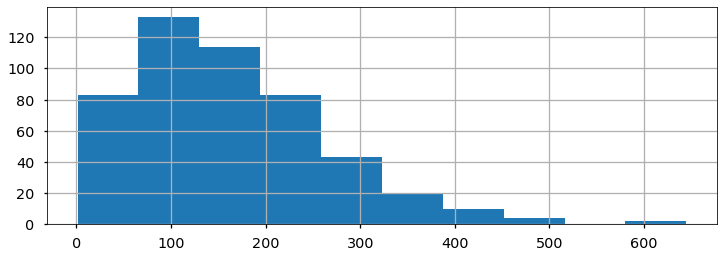

In [18]:
df['chuva'].hist()

In [19]:
# Resumo das variáveis categóricas
# df[cats].describe()

## Análise Univariada - Box Plots

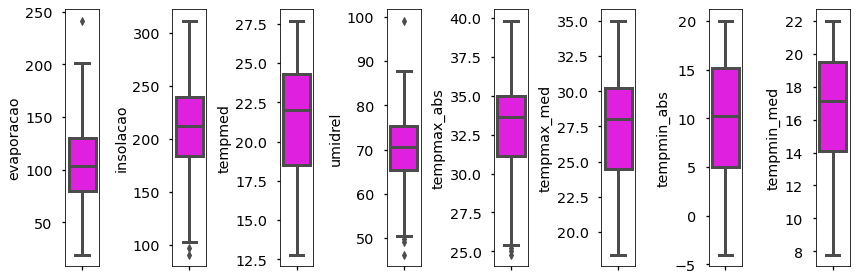

In [20]:
features = nums
for i in range(0, len(features)):
    plt.subplot(1, len(features), i + 1)
    sns.boxplot(y = df[features[i]], color = 'magenta', orient = 'v')
    plt.tight_layout()

Verificar os outliers

## Análise Univariada - Dist Plots

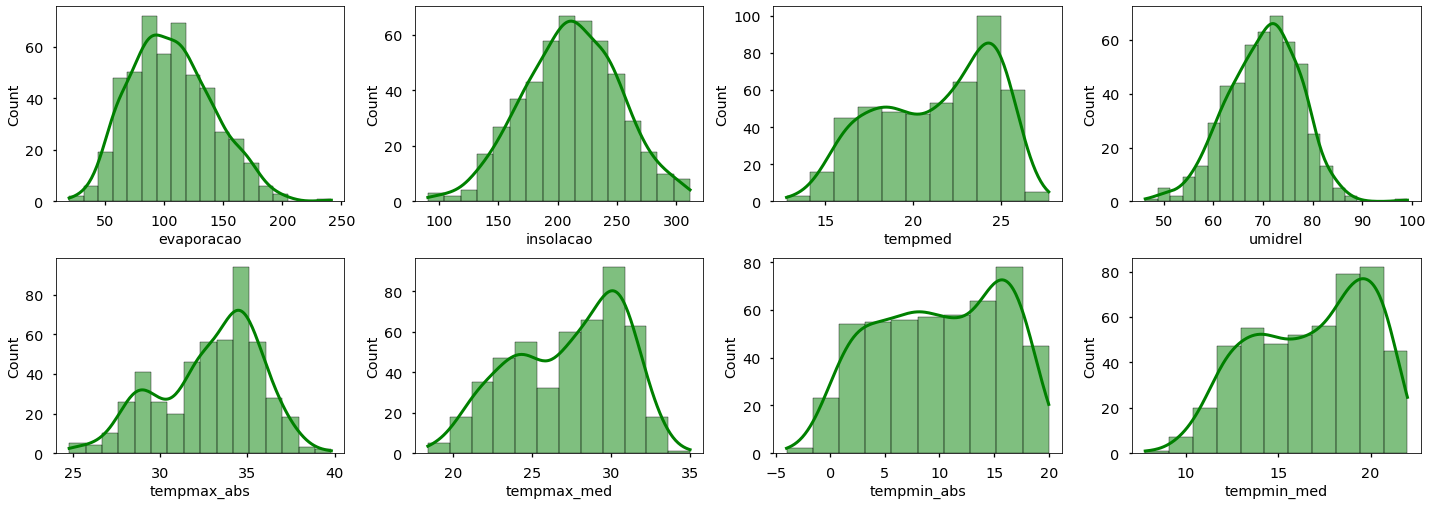

In [21]:
features = nums
plt.figure(figsize = (20, 10))
for i in range(0, len(nums)):
    plt.subplot(3, len(nums)/2, i+1)
    sns.histplot(x = df[features[i]], kde = True, color = 'green')
    plt.xlabel(features[i])
    plt.tight_layout()

## Análise Bivariada - Mapa de Correlação

In [22]:
df[nums].corr()

,evaporacao,insolacao,tempmed,umidrel,tempmax_abs,tempmax_med,tempmin_abs,tempmin_med
evaporacao,1.000000,0.598780,0.414377,-0.735753,0.574914,0.497107,0.228042,0.280023
insolacao,0.598780,1.000000,0.529275,-0.593181,0.505628,0.626832,0.386354,0.394825
tempmed,0.414377,0.529275,1.000000,-0.134345,0.826629,0.983481,0.916792,0.980774
umidrel,-0.735753,-0.593181,-0.134345,1.000000,-0.383994,-0.252983,0.064982,0.029300
tempmax_abs,0.574914,0.505628,0.826629,-0.383994,1.000000,0.855945,0.671629,0.755016
tempmax_med,0.497107,0.626832,0.983481,-0.252983,0.855945,1.000000,0.873260,0.935801
tempmin_abs,0.228042,0.386354,0.916792,0.064982,0.671629,0.873260,1.000000,0.936230
tempmin_med,0.280023,0.394825,0.980774,0.029300,0.755016,0.935801,0.936230,1.000000


In [23]:
corr_df = df[nums].corr()

In [24]:
corr_df

,evaporacao,insolacao,tempmed,umidrel,tempmax_abs,tempmax_med,tempmin_abs,tempmin_med
evaporacao,1.000000,0.598780,0.414377,-0.735753,0.574914,0.497107,0.228042,0.280023
insolacao,0.598780,1.000000,0.529275,-0.593181,0.505628,0.626832,0.386354,0.394825
tempmed,0.414377,0.529275,1.000000,-0.134345,0.826629,0.983481,0.916792,0.980774
umidrel,-0.735753,-0.593181,-0.134345,1.000000,-0.383994,-0.252983,0.064982,0.029300
tempmax_abs,0.574914,0.505628,0.826629,-0.383994,1.000000,0.855945,0.671629,0.755016
tempmax_med,0.497107,0.626832,0.983481,-0.252983,0.855945,1.000000,0.873260,0.935801
tempmin_abs,0.228042,0.386354,0.916792,0.064982,0.671629,0.873260,1.000000,0.936230
tempmin_med,0.280023,0.394825,0.980774,0.029300,0.755016,0.935801,0.936230,1.000000


<AxesSubplot:>

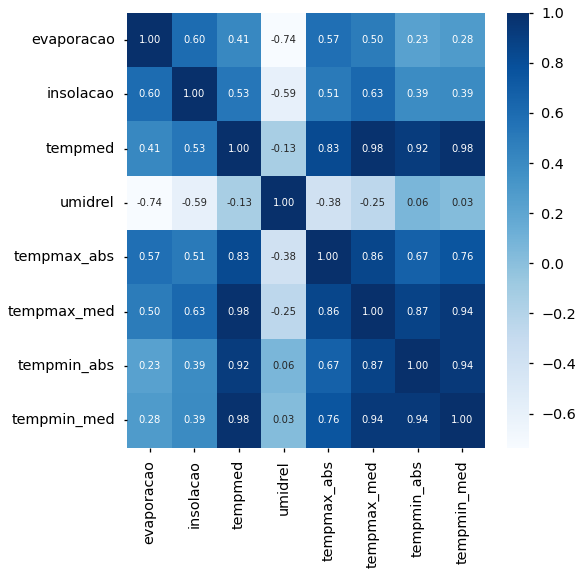

In [25]:
plt.figure(figsize = (8, 8))
sns.heatmap(corr_df, cmap = 'Blues', annot = True, fmt = '.2f')

## Análise Bivariada - Pair Plot

<Figure size 1080x1080 with 0 Axes>

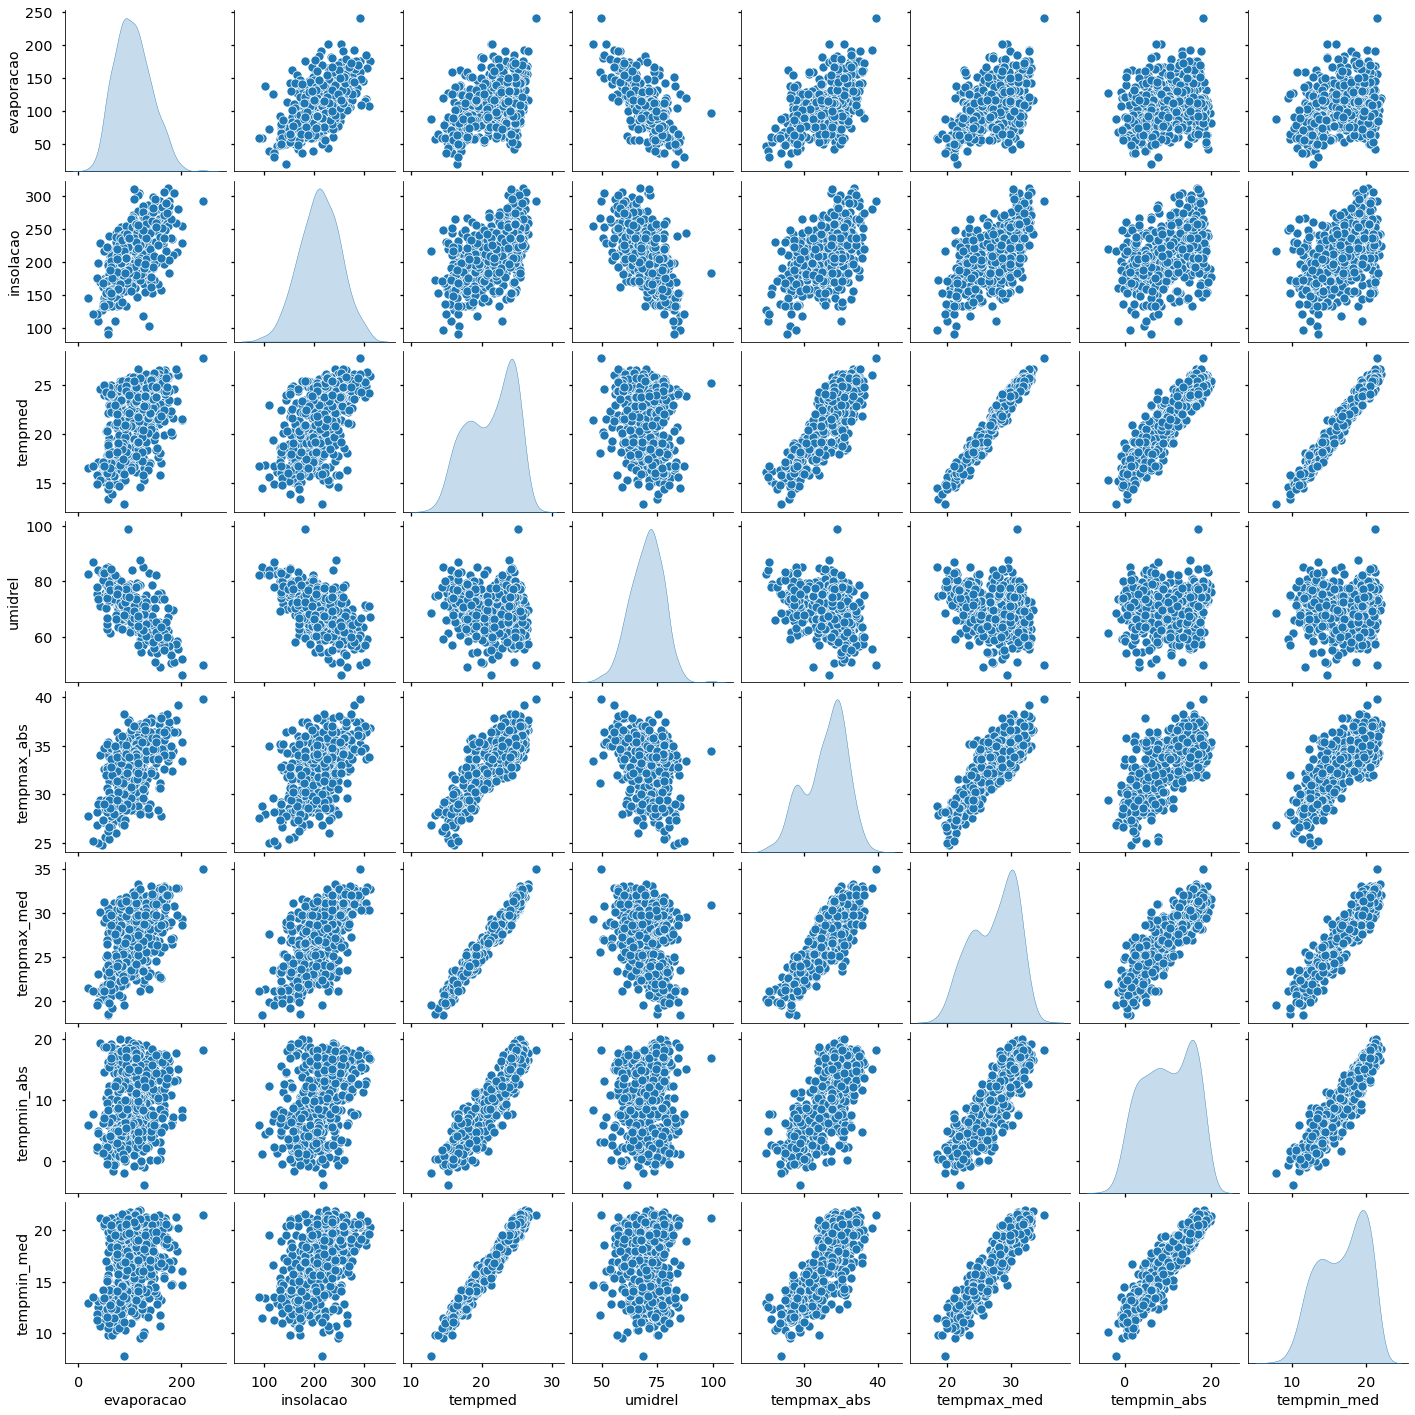

In [26]:
plt.figure(figsize = (15, 15))
sns.pairplot(df[nums], diag_kind = 'kde')

(array([2., 1., 1., 2., 0., 0., 0., 0., 0., 1., 1., 0., 3., 2., 0., 2., 0.,
        0., 2., 2., 1., 1., 1., 0., 2., 3., 0., 3., 4., 1., 2., 2., 1., 2.,
        1., 1., 0., 2., 2., 2., 0., 1., 2., 1., 0., 2., 2., 2., 0., 3., 0.,
        4., 3., 1., 1., 3., 3., 3., 0., 1., 1., 3., 1., 4., 1., 1., 1., 2.,
        1., 5., 0., 2., 3., 5., 4., 6., 1., 3., 1., 3., 2., 4., 3., 3., 3.,
        0., 1., 4., 2., 1., 0., 1., 2., 2., 2., 0., 2., 2., 0., 1., 3., 1.,
        0., 2., 2., 1., 1., 0., 0., 2., 5., 2., 3., 2., 6., 5., 1., 2., 2.,
        2., 1., 2., 2., 2., 3., 0., 2., 0., 3., 1., 1., 3., 0., 1., 0., 3.,
        3., 1., 2., 6., 0., 1., 5., 4., 2., 2., 3., 1., 0., 0., 2., 0., 1.,
        1., 1., 4., 0., 4., 2., 0., 8., 0., 1., 2., 0., 2., 2., 2., 2., 3.,
        1., 4., 3., 1., 0., 1., 2., 2., 1., 1., 0., 2., 4., 2., 1., 1., 0.,
        1., 2., 2., 4., 3., 3., 1., 1., 1., 1., 2., 4., 2., 3., 0., 0., 1.,
        1., 0., 1., 1., 0., 1., 1., 1., 2., 1., 1., 1., 2., 1., 1., 0., 4.,
        4., 

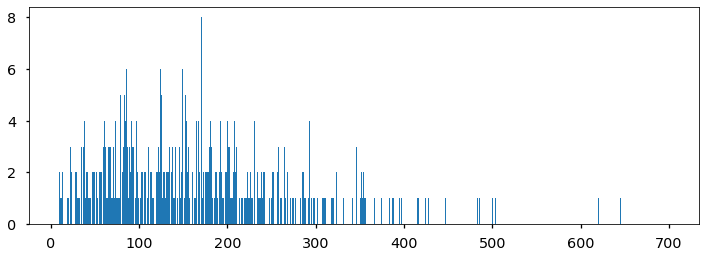

In [53]:
plt.hist(df['chuva'],bins=np.arange(10,700,1))

In [14]:
# Qual a distribuição da chuva em mm
# chuvas frequentes

# Gerando um histograma - bins qtda colunas
df.fontes.hist(bins = 50)
plt.xlabel("mm")
plt.ylabel("Frequência")
plt.title("Distribuição das Chuvas")
plt.show()

AttributeError: 'DataFrame' object has no attribute 'fontes'

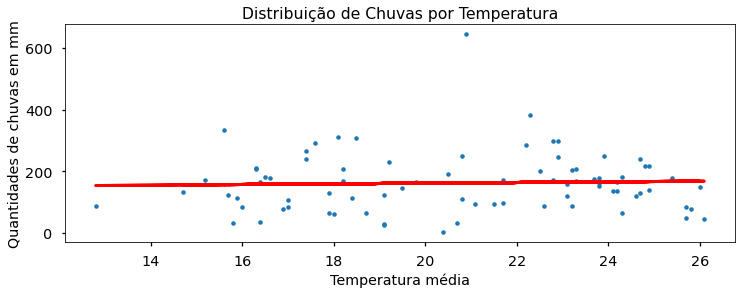

In [31]:
# Relação de chuvas por temperatura - verificar outliers

import warnings
warnings.filterwarnings('ignore')

# Criando subset dos dados - realizando um copia df para df9 - dropna (removendo valores missing NaN)
df9 = df.copy()
df9 = df9.dropna(subset=["tempmed"])
df9 = df9[df['chuva'].isin(range(0,1000))]

# Definindo os valores de x e y
x = df9.tempmed
y = df9.chuva

# Computando os valores e gerando o gráfico
m, b = np.polyfit(x, y, 1)
plt.plot(x, y, '.')
plt.plot(x, m*x + b, '-', color = "red")
plt.xlabel("Temperatura média")
plt.ylabel("Quantidades de chuvas em mm")
plt.title("Distribuição de Chuvas por Temperatura")
plt.show()

Text(0, 0.5, 'tempmin_abs')

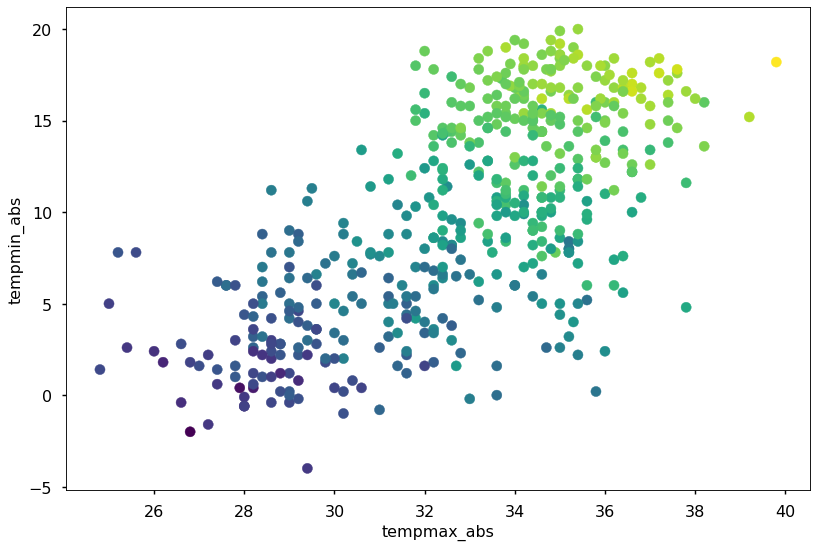

In [32]:
# Criando um Scatter Plot de 2 Features (atributos)
plt.figure(figsize=(12, 8), dpi=80)
plt.scatter(df['tempmax_abs'], df['tempmin_abs'], c=df['tempmed'])
plt.xlabel('tempmax_abs')
plt.ylabel('tempmin_abs')

In [26]:
df['ano'].unique()

array([1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985,
       1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996,
       1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007,
       2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015], dtype=int64)

In [6]:
df['mes'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12], dtype=int64)

In [5]:
print(df.head())

    ano  mes  chuva  evaporacao  insolacao  tempmed  umidrel  tempmax_abs  \
0  1975    1  136.0       134.9      224.7     24.2     70.9         34.4   
1  1975    2  242.9       104.4      195.3     25.3     76.9         36.2   
2  1975    3  125.1       101.1      192.8     23.9     79.1         33.7   
3  1975    4   98.9       156.8      201.5     21.0     75.0         30.6   
4  1975    5   66.3        95.5      203.6     18.1     72.1         29.0   

   tempmax_med  tempmin_abs  tempmin_med  
0         30.7         14.6         18.9  
1         30.4         16.8         21.1  
2         29.9         17.3         19.7  
3         26.8         13.4         16.8  
4         23.8          9.0         14.3  


In [7]:
# Verificando o formato dos dados
df.shape

(492, 11)

In [11]:
df = df.dropna()

In [12]:
df.shape

(492, 11)

In [13]:
BP_f=df.values

In [14]:
BP_f.shape

(492, 11)

In [15]:
BP_f

array([[1.975e+03, 1.000e+00, 1.360e+02, ..., 3.070e+01, 1.460e+01,
        1.890e+01],
       [1.975e+03, 2.000e+00, 2.429e+02, ..., 3.040e+01, 1.680e+01,
        2.110e+01],
       [1.975e+03, 3.000e+00, 1.251e+02, ..., 2.990e+01, 1.730e+01,
        1.970e+01],
       ...,
       [2.015e+03, 1.000e+01, 1.106e+02, ..., 2.980e+01, 1.220e+01,
        1.950e+01],
       [2.015e+03, 1.100e+01, 2.470e+02, ..., 2.760e+01, 1.240e+01,
        1.950e+01],
       [2.015e+03, 1.200e+01, 4.161e+02, ..., 2.860e+01, 1.700e+01,
        2.050e+01]])

In [8]:
# Verificando as primeiras linhas do dataset
df.head(12)

,ano,mes,chuva,evaporacao,insolacao,tempmed,umidrel,tempmax_abs,tempmax_med,tempmin_abs,tempmin_med
0,1975,1,136.0,134.9,224.7,24.2,70.9,34.4,30.7,14.6,18.9
1,1975,2,242.9,104.4,195.3,25.3,76.9,36.2,30.4,16.8,21.1
2,1975,3,125.1,101.1,192.8,23.9,79.1,33.7,29.9,17.3,19.7
3,1975,4,98.9,156.8,201.5,21.0,75.0,30.6,26.8,13.4,16.8
4,1975,5,66.3,95.5,203.6,18.1,72.1,29.0,23.8,9.0,14.3
5,1975,6,116.6,161.5,157.2,17.0,75.7,27.8,22.6,1.6,13.2
6,1975,7,72.7,127.1,219.2,15.3,61.5,29.4,22.0,-4.0,10.1
7,1975,8,98.5,126.9,166.4,20.0,67.8,32.2,25.9,6.0,15.6
8,1975,9,210.1,78.7,139.3,20.1,71.7,32.5,25.3,11.4,16.1
9,1975,10,170.4,112.2,187.7,20.5,69.8,34.2,26.0,9.9,15.9


In [8]:
# Lista todas as colunas
list(df)

['ano',
 'mes',
 'chuva',
 'evaporacao',
 'insolacao',
 'tempmed',
 'umidrel',
 'tempmax_abs',
 'tempmax_med',
 'tempmin_abs',
 'tempmin_med']

In [9]:
Labels=list(df.columns)

In [10]:
Labels

['ano',
 'mes',
 'chuva',
 'evaporacao',
 'insolacao',
 'tempmed',
 'umidrel',
 'tempmax_abs',
 'tempmax_med',
 'tempmin_abs',
 'tempmin_med']

In [22]:
df.loc[(df['chuva']==10) & (df['ano']==1978)].count()

ano            0
mes            0
chuva          0
evaporacao     0
insolacao      0
tempmed        0
umidrel        0
tempmax_abs    0
tempmax_med    0
tempmin_abs    0
tempmin_med    0
dtype: int64

In [23]:
# Verificando as últimas linhas do dataset
df.tail(5)

,ano,mes,chuva,evaporacao,insolacao,tempmed,umidrel,tempmax_abs,tempmax_med,tempmin_abs,tempmin_med
487,2015,8,37.8,154.0,225.7,21.5,60.0,33.6,28.3,10.4,16.5
488,2015,9,89.4,160.7,205.7,21.8,63.5,37.8,28.6,4.8,16.8
489,2015,10,110.6,129.8,196.7,23.9,71.3,36.6,29.8,12.2,19.5
490,2015,11,247.0,72.0,110.8,22.9,82.2,35.0,27.6,12.4,19.5
491,2015,12,416.1,64.4,152.7,24.1,84.4,32.8,28.6,17.0,20.5


In [24]:
# Verificando se existem valores nulos
df.isnull().values.any()

False

In [25]:
#Estatistica descritiva-tendência central dispersão e forma da distribuição de um conjunto de dados, excluindo dados missing-NaN
print(df.describe())

               ano         mes       chuva  evaporacao   insolacao  \
count   492.000000  492.000000  492.000000  492.000000  492.000000   
mean   1995.000000    6.500000  162.520732  106.154878  211.632317   
std      11.844202    3.455566  102.756375   34.925442   40.324387   
min    1975.000000    1.000000    1.300000   19.300000   90.600000   
25%    1985.000000    3.750000   84.625000   79.975000  184.150000   
50%    1995.000000    6.500000  149.100000  103.800000  211.700000   
75%    2005.000000    9.250000  221.800000  129.650000  239.600000   
max    2015.000000   12.000000  645.000000  241.500000  311.600000   

          tempmed     umidrel  tempmax_abs  tempmax_med  tempmin_abs  \
count  492.000000  492.000000   492.000000   492.000000   492.000000   
mean    21.328659   70.090244    32.877846    27.288008     9.966667   
std      3.314772    7.289662     2.844414     3.505474     5.716075   
min     12.800000   46.300000    24.800000    18.400000    -4.000000   
25%     1

In [26]:
# Criando função - Identificando a correlação entre as variáveis
# Correlação não implica causalidade
def plot_corr(df, size=10):
    corr = df.corr()    
    fig, ax = plt.subplots(figsize = (size, size))
    ax.matshow(corr)  
    plt.xticks(range(len(corr.columns)), corr.columns) 
    plt.yticks(range(len(corr.columns)), corr.columns) 

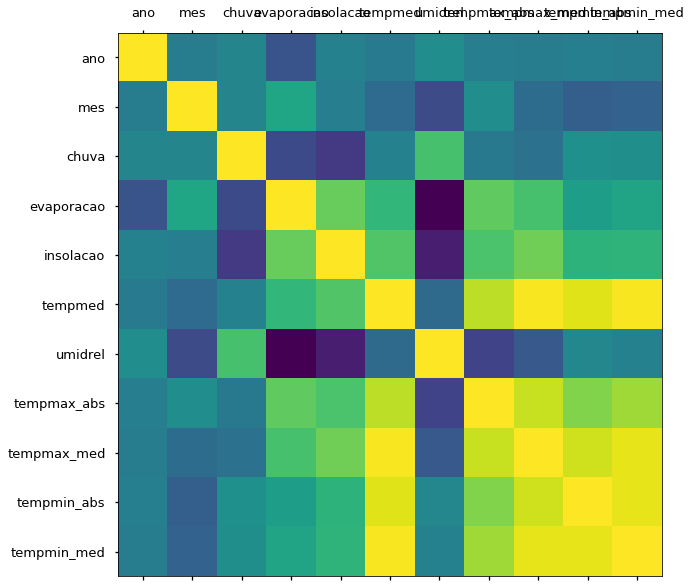

In [27]:
# Criando o gráfico
plot_corr(df)

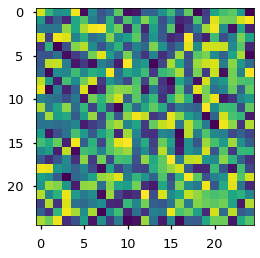

In [16]:
plt.imshow(np.random.rand(25,25))

In [20]:
list(df)

['ano',
 'mes',
 'chuva',
 'evaporacao',
 'insolacao',
 'tempmed',
 'umidrel',
 'tempmax_abs',
 'tempmax_med',
 'tempmin_abs',
 'tempmin_med']